In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [ ]:
filename = "./sounds/test.wav"
fs, data = wavfile.read(filename)

ipd.display(ipd.HTML("original audio"))
ipd.display(ipd.Audio(data, rate=fs))
print(f"Sampling rate: {fs}")

Sampling rate: 44100


In [ ]:
window_length_ms= 30
window_length = int(np.round(fs*window_length_ms/1000))
print(f"Window length: {window_length}")

n = np.linspace(0.5, window_length-0.5, num=window_length)
print(f"n: {n}")
print(f"n.shape: {n.shape}")

# windowing function
windowing_fn = np.sin(np.pi*n/window_length)**2 # Hann window
print(f"Windowing function: {windowing_fn}")
print(f"windowing_fn.shape: {windowing_fn.shape}")

datawin = data[38000:(38000+window_length)]
# normalize the data
datawin = datawin/np.max(np.abs(datawin))
print(f"datawin: {datawin}")
print(f"datawin.shape: {datawin.shape}")

Window length: 1323
n: [5.0000e-01 1.5000e+00 2.5000e+00 ... 1.3205e+03 1.3215e+03 1.3225e+03]
n.shape: (1323,)
Windowing function: [1.40967780e-06 1.26870525e-05 3.52415477e-05 ... 3.52415477e-05
 1.26870525e-05 1.40967780e-06]
windowing_fn.shape: (1323,)
datawin: [-0.1658378  -0.26692808 -0.25478194 ...  0.44433818  0.44519893
  0.28442999]
datawin.shape: (1323,)


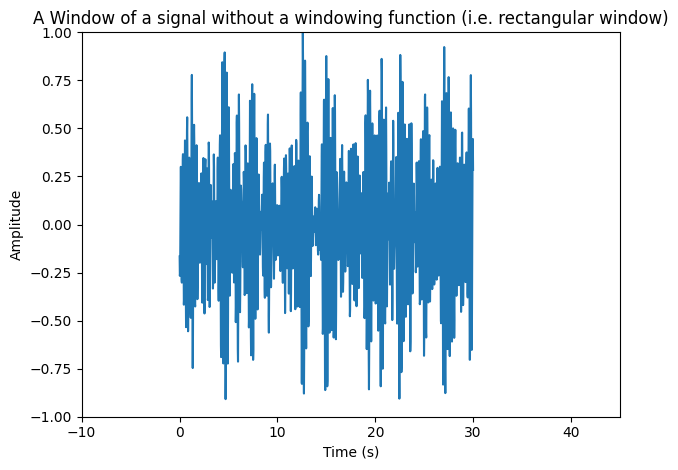

In [ ]:
# Rectangular window
plt.plot(n*1000/fs, datawin)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Windowed data")
plt.title("A Window of a signal without a windowing function (i.e. rectangular window)")
plt.axis([-10., 45., -1., 1.])
plt.tight_layout()
plt.show()

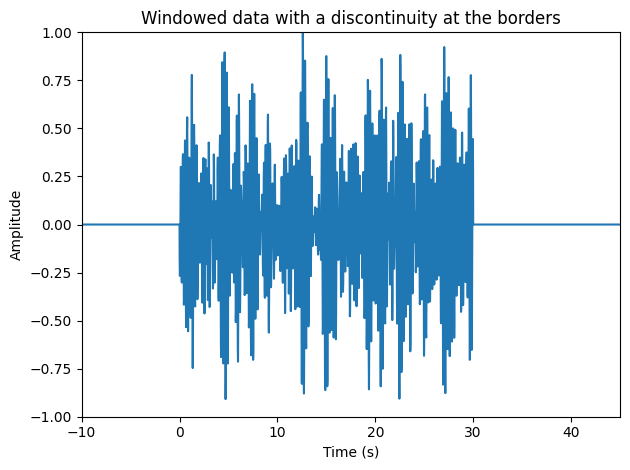

In [ ]:
# Rectangular window as if it had a discontinuity at the borders
nx = np.concatenate(([-1000, 0.], n, [window_length, window_length+1000]))
datax = np.concatenate(([0., 0.], datawin, [0., 0.]))
plt.plot(nx*1000/fs, datax)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Windowed data with a discontinuity at the borders")
plt.axis([-10., 45., -1., 1.])
plt.tight_layout()
plt.show()

## ANALYSIS APPLICATIONS

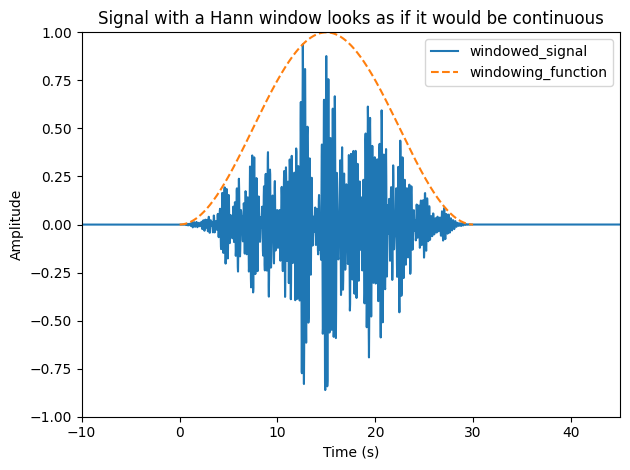

In [ ]:
nx = np.concatenate(([-1000, 0.], n, [window_length, window_length+1000]))
datax = np.concatenate(([0., 0.], datawin*windowing_fn, [0., 0.]))
plt.plot(nx*1000/fs, datax, label="windowed_signal")
plt.plot(n*1000/fs, windowing_fn, "--", label="windowing_function")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Signal with a Hann window looks as if it would be continuous")
plt.axis([-10., 45., -1., 1.])
plt.tight_layout()
plt.show()

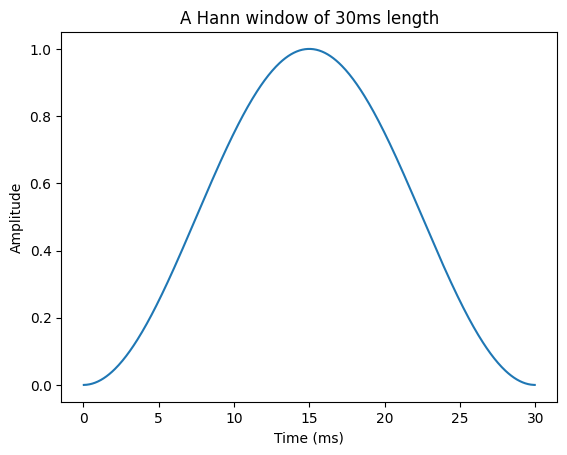

In [ ]:
# Window parameters in milliseconds
window_length_ms = 30
fs = 16000

window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5, window_length-0.5, num=window_length)

# Windowing function
windowing_fn = np.sin(np.pi*n/window_length)**2 ## Hann window

plt.plot(n*1000/fs, windowing_fn)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("A Hann window of 30ms length")
plt.show()

## PROCESSING APPLICATION

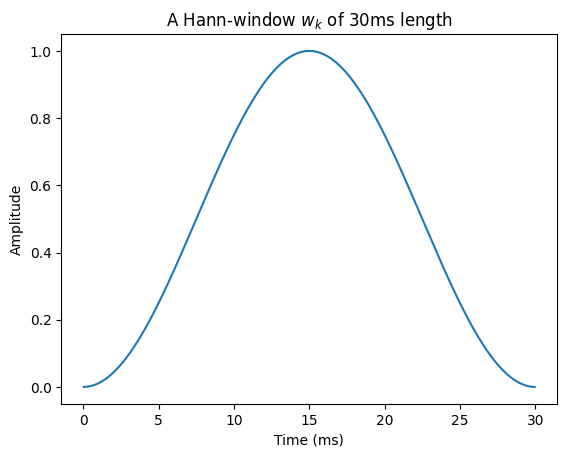

In [ ]:
# Hann window wk of 30ms length
window_length_ms = 30
fs = 16000

window_length = int(np.round(fs*window_length_ms/1000))

n = np.linspace(0.5,window_length-0.5,num=window_length) # 0.5 because Princen-Bradley criterion with w[n] = sin(π(n + 0.5)/L)

# windowing function
windowing_fn = np.sin(np.pi*n/window_length)**2 # sine-window

plt.plot(n*1000/fs,windowing_fn)    
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('A Hann-window $w_k$ of 30ms length')
plt.show()

window_length_ms: 30
window_step_ms: 15.0
window_step: 662
window_length: 1324
window_count: 186


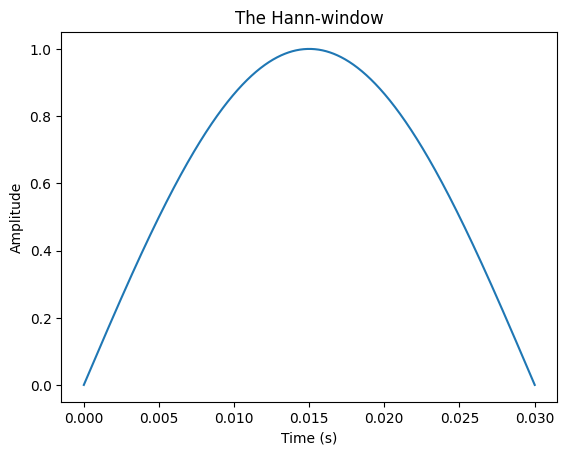

In [ ]:
# read from storage
filename = 'sounds/test.wav'
fs, data = wavfile.read(filename)
data = np.float64(data)

# window parameters in milliseconds
window_length_ms = 30
print(f"window_length_ms: {window_length_ms}")
window_step_ms = window_length_ms/2
print(f"window_step_ms: {window_step_ms}")

window_step = int(np.round(fs*window_step_ms/1000))
print(f"window_step: {window_step}")
window_length = window_step*2
print(f"window_length: {window_length}")
window_count = int(np.floor((data.shape[0]-window_length)/window_step)+1)
print(f"window_count: {window_count}")


# windowing function
windowing_fn = np.sin(np.pi*np.linspace(0.5,window_length-0.5,num=window_length)/window_length) # half-sine window

n = np.linspace(0.5,window_length-0.5,num=window_length)

plt.plot(n/fs,windowing_fn)
plt.title('The Hann-window')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
# Extract windows
window_matrix = np.zeros([window_length,window_count],dtype=np.float64)
print(window_matrix.shape)
for window_ix in range(window_count):
    window_matrix[:,window_ix] = np.multiply(windowing_fn,data[window_ix*window_step+np.arange(window_length)])

# Reconstruct
data_reconstructed = np.zeros_like(data)
for window_ix in range(window_count):
    data_reconstructed[window_ix*window_step + np.arange(window_length)] += window_matrix[:,window_ix]*windowing_fn

(1324, 186)


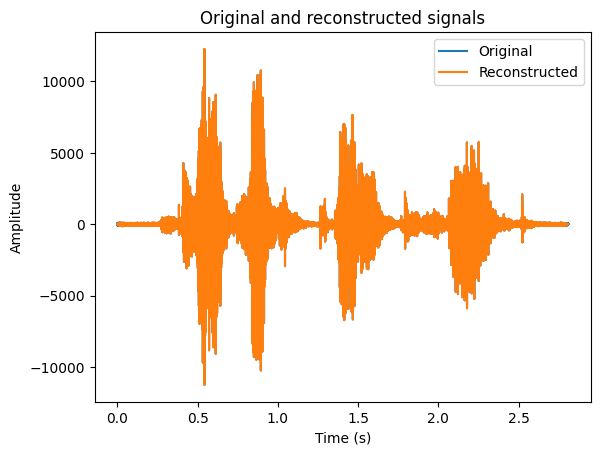

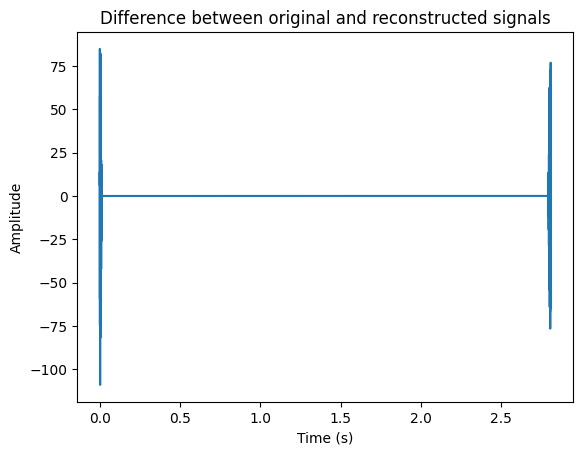

In [ ]:

t = np.arange(0,np.float64(data.shape[0])/fs,1./fs)
plt.plot(t,data,label='Original')
plt.plot(t,data_reconstructed,label='Reconstructed')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Original and reconstructed signals')
plt.show()
plt.plot(t,data-data_reconstructed)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Difference between original and reconstructed signals')
plt.show()